In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import scipy.stats as sct
import seaborn as sns
import warnings

from IPython.core.pylabtools import figsize
from scipy.stats import norm


warnings.filterwarnings('ignore')

figsize(12, 8)

sns.set()

df_ab_nyc = pd.read_csv('./data/AB_NYC_2019.csv')

# Questão 1

 a) Lista de hosts distintos (coluna name), agrupados pela coluna ​ room_type.

* **SELECT** distinct name **FROM** ab_nyc **GROUP BY** name, room_type;

b) Total de reviews e média de reviews por mês para ​ hosts localizados no Brooklyn.

* **SELECT** SUM(number_of_reviews), reviews_per_month **FROM** ab_nyc **WHERE** neighbourhood_group = 'Brooklyn' **GROUP BY** reviews_per_month;

c) Trazer a quantidade de dias disponíveis, valores mínimo, máximo e média da coluna
price para cada host que contenha a palavra room na coluna name e estiveram
disponíveis ao menos um dia para locação (considere availability_365 como o
número de dias disponíveis para locação). O resultado deve estar agrupado por
quantidade de dias disponíveis.

* **SELECT** availability_365, min(price), max(price), avg(price) **FROM** ab_nyc  **WHERE** name **LIKE** '%room%' and availability_365 >= 1 **GROUP BY** availability_365; 


<hr>

# Questão 2

Crie um script em Python ou Node.js que carrega os dados do dataset e, como
saída, crie um arquivo CSV somente as seguintes colunas do dataset original:
id, host_id, price, number_of_reviews, last_review (0,5 ponto).

In [2]:

columns = ['id', 'host_id', 'price', 'number_of_reviews', 'last_review']
df_ab_nyc.to_csv('./data/filtered_dataset.csv', columns=columns)

<hr>

# Questão 3

#### Primeiro passo é conhecer o dataset. Uma visão geral dos dados, que tipo de dados o dataset possui, quantos valores nulos possuem em suas colunas e outros indicadores descritivos.

In [3]:
# tamanho do dataset
df_ab_nyc.shape

(48895, 16)

In [4]:
# principais valores estatísticos no dataset
df_ab_nyc.describe()

,id,host_id,latitude,longitude,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
count,4.889500e+04,4.889500e+04,48895.000000,48895.000000,48895.000000,48895.000000,48895.000000,38843.000000,48895.000000,48895.000000
mean,1.901714e+07,6.762001e+07,40.728949,-73.952170,152.720687,7.029962,23.274466,1.373221,7.143982,112.781327
std,1.098311e+07,7.861097e+07,0.054530,0.046157,240.154170,20.510550,44.550582,1.680442,32.952519,131.622289
min,2.539000e+03,2.438000e+03,40.499790,-74.244420,0.000000,1.000000,0.000000,0.010000,1.000000,0.000000
25%,9.471945e+06,7.822033e+06,40.690100,-73.983070,69.000000,1.000000,1.000000,0.190000,1.000000,0.000000
50%,1.967728e+07,3.079382e+07,40.723070,-73.955680,106.000000,3.000000,5.000000,0.720000,1.000000,45.000000
75%,2.915218e+07,1.074344e+08,40.763115,-73.936275,175.000000,5.000000,24.000000,2.020000,2.000000,227.000000
max,3.648724e+07,2.743213e+08,40.913060,-73.712990,10000.000000,1250.000000,629.000000,58.500000,327.000000,365.000000


#### Construímos um dataset auxiliar com a finalidade de auxiliar a visualização dos tipos de dados que contém o dataset bem como a quantidade de valores nulos. Caso alguma coluna possua um número de dados faltantes expressivo, ela pode ser removida. 

In [6]:
aux_dt = pd.DataFrame({'columns': df_ab_nyc.columns,
                       'type': df_ab_nyc.dtypes,
                       'nulls': df_ab_nyc.isnull().sum(),
                       'null_percentage': (df_ab_nyc.isnull().sum()*100) / df_ab_nyc.shape[0]})
aux_dt.sort_values('nulls', ascending=False)

,columns,type,nulls,null_percentage
last_review,last_review,object,10052,20.558339
reviews_per_month,reviews_per_month,float64,10052,20.558339
host_name,host_name,object,21,0.042949
name,name,object,16,0.032723
id,id,int64,0,0.000000
host_id,host_id,int64,0,0.000000
neighbourhood_group,neighbourhood_group,object,0,0.000000
neighbourhood,neighbourhood,object,0,0.000000
latitude,latitude,float64,0,0.000000
longitude,longitude,float64,0,0.000000


#### De início podemos eliminar algumas variáveis não vão interferir no preço

In [7]:
columns_to_delete = ['id', 'name', 'host_name', 'last_review']
new_dt = df_ab_nyc.drop(columns_to_delete, axis='columns')

#### Preenchemos os valores faltantes de reviews por mês por zero

In [8]:
new_dt.fillna(0, inplace=True)

#### Vamos avaliar a variável alvo e verificar seus principais indicadores estatísticos

In [9]:
new_dt['price'].describe()

count    48895.000000
mean       152.720687
std        240.154170
min          0.000000
25%         69.000000
50%        106.000000
75%        175.000000
max      10000.000000
Name: price, dtype: float64

#### Verificamos como está distribuída a variável alvo

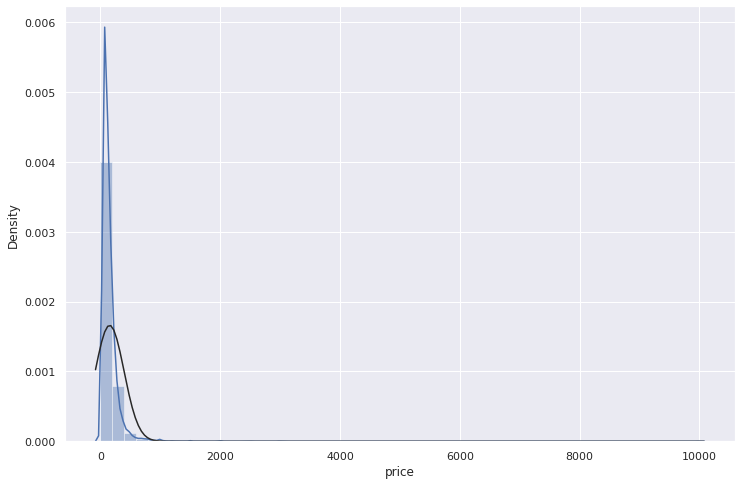

<Figure size 864x576 with 0 Axes>

In [11]:
sns.distplot(new_dt['price'], fit=norm);
fig = plt.figure()

#### Calculamos a assimetria e curtose para verificar o padrão da distribuição

In [424]:
print("Assimetria: %f" % new_dt['price'].skew())
print("Curtose: %f" % new_dt['price'].kurt())

Assimetria: 19.118939
Curtose: 585.672879


#### De acordo com o gráfico de distribuição e os valores acima de assimetria e curtose, podemos verificar que a variável preço não pertence a uma distribuição normal, se relacionando mais com uma distrubuição de log.
#### Analisando o gráfico e os valores dos quartis, verificamos que a distribuição do preço possui muitos valores extremos. Necessário realizar um corte destes valores. Considerando que o valor mínimo no quarto percentil é de 175, muito distante do valor máximo de 10000, vamos utilizar um valor intermediário para realizar o corte.

In [13]:
new_dt[new_dt['price'] > 175].count()['price']

12177

#### Cortando exatamente em 175, vários valores são cortados. Vamos aumentar o limite

In [14]:
new_dt[new_dt['price'] > 600].count()['price']

778

#### Vamos verificar a distribuição com um limite superior

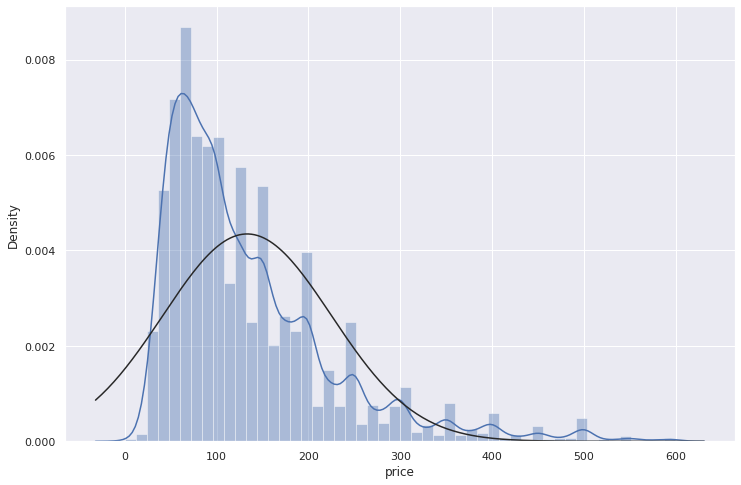

<Figure size 864x576 with 0 Axes>

In [451]:
threshold_600 = new_dt[new_dt['price'] < 600]
sns.distplot(threshold_600['price'], fit=norm);
fig = plt.figure()

#### Como este é um método de corte baseado na visualização, vamos diminuir o limite para 500, último pico no gráfico acima, para evitar excluir muitos registros

In [460]:
# total de valores excluídos adotante este limite
new_dt[new_dt['price'] > 500].count()['price']

1044

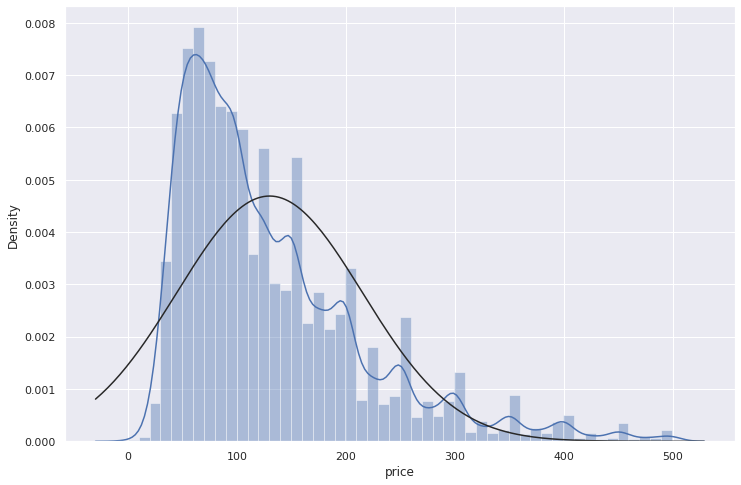

<Figure size 864x576 with 0 Axes>

In [458]:
threshold_500 = new_dt[new_dt['price'] < 500]
sns.distplot(threshold_500['price'], fit=norm);
fig = plt.figure()

#### Verificamos no gráfico acima que a distribuição ficou mais "clara", diminuindo o número de registros extremos. A partir de agora o dataset utilizado será com este limite

In [15]:
df = new_dt[new_dt['price'] < 500]

#### Um histograma é muito útil para entender a distribuição das variáveis. 

array([[<AxesSubplot:title={'center':'host_id'}>,
        <AxesSubplot:title={'center':'latitude'}>,
        <AxesSubplot:title={'center':'longitude'}>],
       [<AxesSubplot:title={'center':'price'}>,
        <AxesSubplot:title={'center':'minimum_nights'}>,
        <AxesSubplot:title={'center':'number_of_reviews'}>],
       [<AxesSubplot:title={'center':'reviews_per_month'}>,
        <AxesSubplot:title={'center':'calculated_host_listings_count'}>,
        <AxesSubplot:title={'center':'availability_365'}>]], dtype=object)

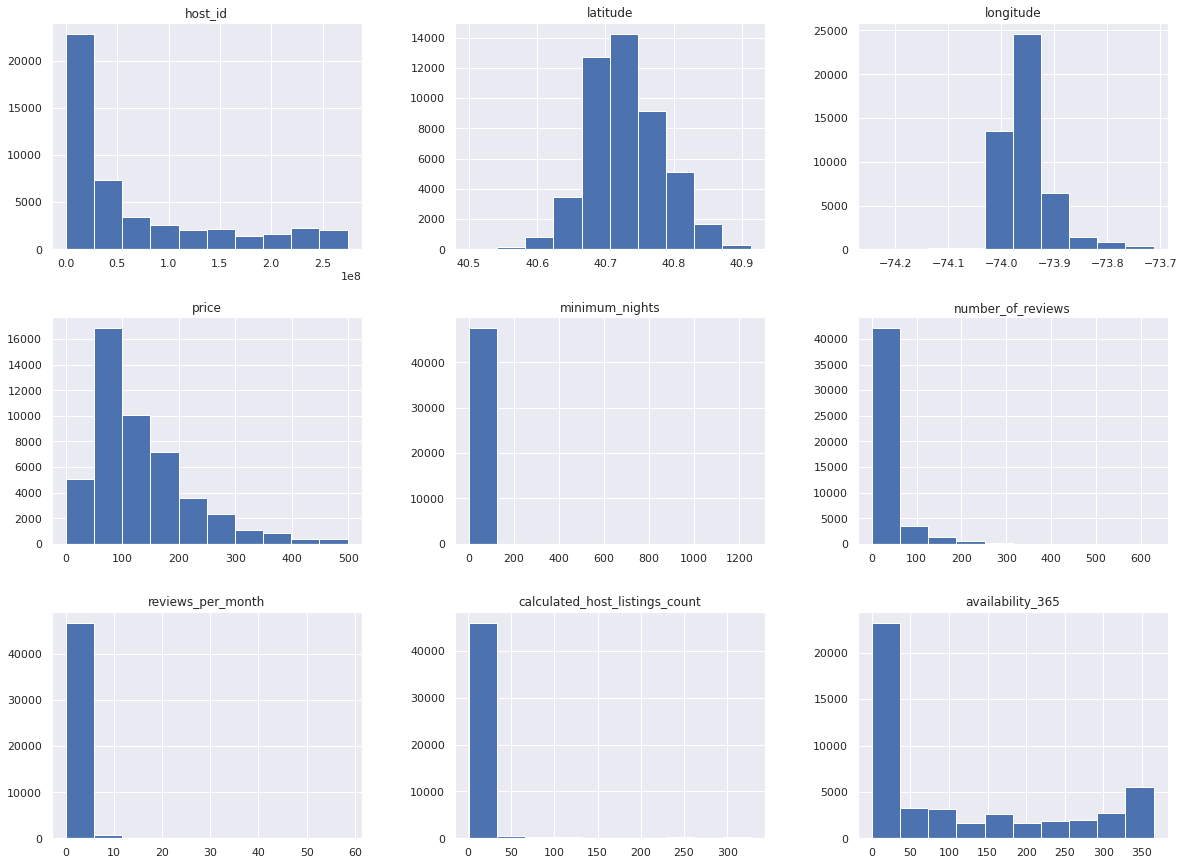

In [24]:
df.hist(figsize=(20,15))

#### Para verificar a relação entre as variáveis utilizamos uma matriz de correlação. Novamente, as variáveis não apresentam uma correlação importante entre si

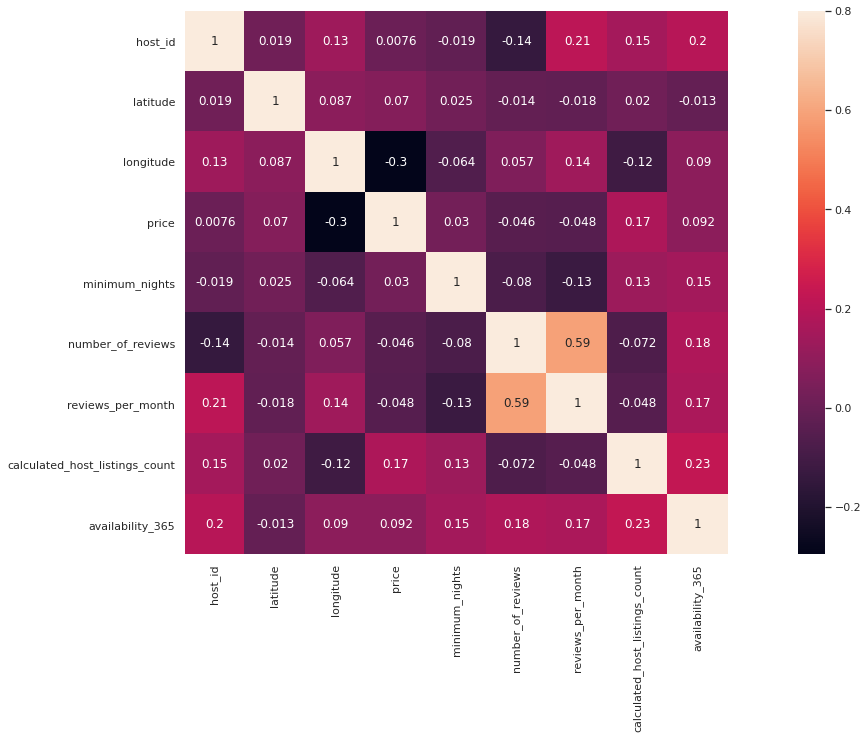

In [23]:
corrmat = df.corr()
f, ax = plt.subplots(figsize=(25, 10))
sns.heatmap(corrmat, vmax=.8, square=True, annot=True);

#### De acordo com a matriz de correlação, não foram encontradas variáveis com forte ou fraca correlação com o preço. Possivelmente estes resultados se devem ao fato de que as variáveis mais relacionadas ao preço sejam categóricas. Abaixo podemos ver o total de valores distintos das principais variáveis categóricas.

In [25]:
print("Valores de room_type")
print(df['room_type'].unique())
print("Valores de neighbourhood_group")
print(df['neighbourhood_group'].unique())
print("Valores de neighbourhood")
print(df['neighbourhood'].unique())

Valores de room_type
['Private room' 'Entire home/apt' 'Shared room']
Valores de neighbourhood_group
['Brooklyn' 'Manhattan' 'Queens' 'Staten Island' 'Bronx']
Valores de neighbourhood
['Kensington' 'Midtown' 'Harlem' 'Clinton Hill' 'East Harlem'
 'Murray Hill' 'Bedford-Stuyvesant' "Hell's Kitchen" 'Upper West Side'
 'Chinatown' 'South Slope' 'West Village' 'Williamsburg' 'Fort Greene'
 'Chelsea' 'Crown Heights' 'Park Slope' 'Windsor Terrace' 'Inwood'
 'East Village' 'Greenpoint' 'Bushwick' 'Flatbush' 'Lower East Side'
 'Prospect-Lefferts Gardens' 'Long Island City' 'Kips Bay' 'SoHo'
 'Upper East Side' 'Prospect Heights' 'Washington Heights' 'Woodside'
 'Carroll Gardens' 'Gowanus' 'Flatlands' 'Cobble Hill' 'Flushing'
 'Boerum Hill' 'Sunnyside' 'DUMBO' 'St. George' 'Highbridge'
 'Financial District' 'Ridgewood' 'Morningside Heights' 'Jamaica'
 'Middle Village' 'NoHo' 'Ditmars Steinway' 'Flatiron District'
 'Roosevelt Island' 'Greenwich Village' 'Little Italy' 'East Flatbush'
 'Tompkinsvi

#### Verificamos que por possuir muitas opções, a variável neighbourhood será descartada da análise

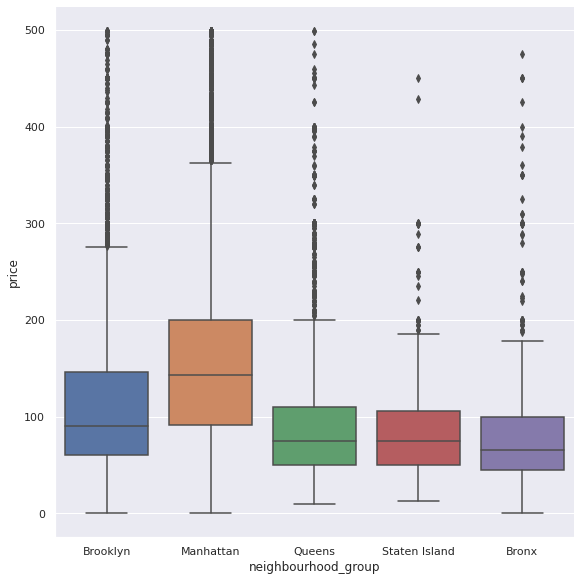

In [33]:
sns.catplot(x="neighbourhood_group", y="price", kind="box", data=df, height=8, aspect=1)

#### Apesar do grande número de outliers, podemos verificar no gráfico acima, que alguns bairros possuem uma interferência maior no preço, como é o caso de Manhattan.

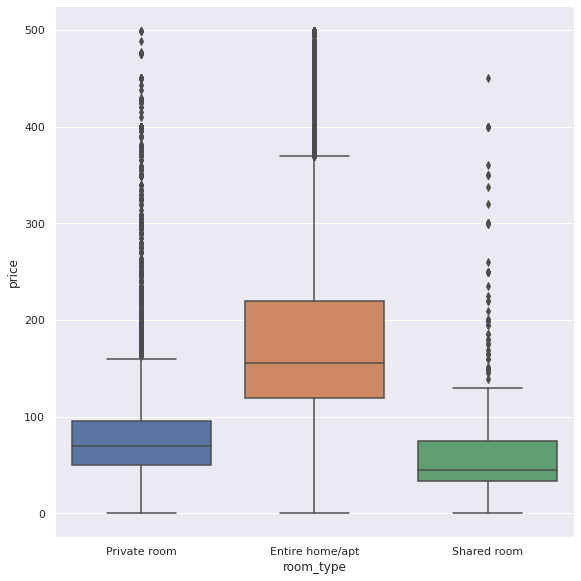

In [34]:
sns.catplot(x="room_type", y="price", kind="box", data=df, height=8, aspect=1)

#### Mesma conclusão podemos tirar do tipo de quarto ofertado. Apartamentos possuem um maior preço. Podemos concluir que as variáveis que mais apresentaram relação com o preço foram o tipo de quarto e o bairro. 

<hr>

# Questão 4

#### Para esta questão foi utilizada a ferramenta Tableau. O motivo de escolha foi apenas uma certa familiaridade que eu possuo com a ferramenta, o que implica em uma entrega mais rápida do desafio. Nas próximas seções serão mostradas print das telas da ferramenta e explicações do processo. Os arquivos salvos do Tableau são encontrados no diretório /data/arquivos-tableau.

## Questão A

#### Considerando que a variável neighbourhood é categórica, um gráfico de barras é uma boa opção. Contudo, esta variável possui muitos valores distintos o que pode deixar o gráfico muito exnteso e difícil de ler. Foi criado no Tableau um grupo na variável neighbourhood para filtrar a visualização dos n maiores valores. Um parâmetro foi associado a estre grupo para o que o limite possa ser dinâmico.

<video controls src="data/questao-4-assets/questao4-a.mp4" width="90%" />

## Questão B

#### Considerando que a variável room_type possui poucos valores distintos um gráfico de barras demonstra bem a diferenã de média da variável minimum_nights agrupada por room_type


![title](data/questao-4-assets/questao4-b.png)

## Questão C

#### Para utilizar um panel de mapa, foi necessário transformar as variáveis latitude e longitude em valores decimais. Para não modificar os dados originais, duas variáveis foram criadas: Lat e Lng. O mapa foi dividido em cores que representam o neighbourhood_group e possui um filtro por room_type, visto que foram as variáveis que mais interferem no preço.

<img src="data/questao-4-assets/questao4-c.png" width=90% height=60 />

## Questão D

#### Considerando que este gráfico tem relação com o tempo, um gráfico de linhas representa bem o comportamento da variável ao longo do tempo

<img src="data/questao-4-assets/questao4-d.png" width=90% height=60 />